In [ ]:
# Install required libraries if not already installed
!pip install pandas matplotlib seaborn openpyxl

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
basic_info = pd.read_excel('/content/basic_information.xlsx')
delivery_info = pd.read_excel('/content/delivery_information.xlsx')
followup_info = pd.read_excel('/content/followup_data.xlsx')

In [3]:
# Display first few rows
print("Basic Info Sample:\n", basic_info.head())
print("Delivery Info Sample:\n", delivery_info.head())
print("Follow-Up Info Sample:\n", followup_info.head())

Basic Info Sample:
   patient_id   ht    wt  education  income  ageatmenarche  ageatmarriage  \
0         P1  151  36.0          7    6000             14             26   
1         P2  143  63.6         15   10000             13             27   
2         P3  150  58.8         15   28000             16             27   
3         P4  159  57.8         11    8000             13             20   
4         P5  148  47.7         12   10000             14             20   

   ageatfirstpregnancy   district village occupation          diet  \
0                   28     Raigad  Alibag     Farmer      Low Carb   
1                   31     Raigad    Roha     Farmer    Vegetarian   
2                   28  Ratnagiri  Dapoli    Teacher      Low Carb   
3                   20  Ratnagiri  Dapoli  Housewife    Vegetarian   
4                   21     Raigad  Alibag  Housewife  High Protein   

     condition  
0     Diabetes  
1  Infertility  
2     Diabetes  
3       Asthma  
4  Infertility  


In [39]:
# Merge datasets on 'patient_id'
merged_data = basic_info.merge(delivery_info, on='patient_id', how='outer')
merged_data = merged_data.merge(followup_info, on='patient_id', how='outer')
merged_data.head(5)

,patient_id,ht,wt,education,income,ageatmenarche,ageatmarriage,ageatfirstpregnancy,district,village,...,Visit2_date,Visit2_wt,Visit3_bpdis,Visit3_bpsys,Visit3_date,Visit3_wt,Visit4_bpdis,Visit4_bpsys,Visit4_date,Visit4_wt
0,P1,151,36.0,7,6000,14,26,28,Raigad,Alibag,...,2021-03-24,38.4,80,110,2021-04-14,38.7,80,120,2021-04-28,39.9
1,P10,151,55.7,7,10000,13,25,27,Ratnagiri,Dapoli,...,2022-04-29,54.5,60,100,2022-05-20,54.0,70,110,2022-06-18,56.8
2,P11,152,43.9,12,10000,14,23,24,Raigad,Pen,...,2022-07-26,40.0,70,110,2022-11-22,48.6,70,100,2023-03-01,43.5
3,P12,154,39.5,12,10000,14,18,19,Raigad,Roha,...,2024-07-26,40.0,70,120,2024-08-22,41.0,70,110,2024-09-18,42.6
4,P13,150,42.1,7,30000,13,21,22,Raigad,Alibag,...,2022-10-21,42.3,70,110,2022-12-07,39.2,70,110,2022-12-08,40.8


DATA CLEANING

In [40]:
# Fill or drop NA values where necessary
merged_data = merged_data.fillna({'education': 'Unknown'})
merged_data['income'] = merged_data['income'].fillna(merged_data['income'].median())
merged_data = merged_data.dropna(subset=['condition'])

In [41]:
# Convert date columns to datetime safely
date_cols = ['dateofdelivery', 'Visit1_date', 'Visit2_date', 'Visit3_date', 'Visit4_date']
merged_data[date_cols] = merged_data[date_cols].apply(pd.to_datetime, errors='coerce')

In [42]:
# Check missing values
print("\nMissing values summary:\n", merged_data.isnull().sum())


Missing values summary:
 patient_id               0
ht                       0
wt                       0
education                0
income                   0
ageatmenarche            0
ageatmarriage            0
ageatfirstpregnancy      0
district                 0
village                  0
occupation               0
diet                     0
condition                0
dateofdelivery           0
ageatdelivery            0
weightatdelivery         0
haemoglobinatdelivery    0
placentalweight          0
termofdelivery           0
typeofdelivery           0
Visit1_bpdis             0
Visit1_bpsys             0
Visit1_date              0
Visit1_wt                0
Visit2_bpdis             0
Visit2_bpsys             0
Visit2_date              0
Visit2_wt                0
Visit3_bpdis             0
Visit3_bpsys             0
Visit3_date              0
Visit3_wt                0
Visit4_bpdis             0
Visit4_bpsys             0
Visit4_date              0
Visit4_wt                0
dt

FEATURE ENGINEERING

In [6]:
merged_data['BMI'] = merged_data['wt'] / (merged_data['ht']/100)**2

# Mean Blood Pressure over visits
merged_data['avg_systolic_bp'] = merged_data[['Visit1_bpsys', 'Visit2_bpsys', 'Visit3_bpsys', 'Visit4_bpsys']].mean(axis=1)
merged_data['avg_diastolic_bp'] = merged_data[['Visit1_bpdis', 'Visit2_bpdis', 'Visit3_bpdis', 'Visit4_bpdis']].mean(axis=1)

# Weight gain during pregnancy (delivery - baseline)
merged_data['weight_gain'] = merged_data['weightatdelivery'] - merged_data['wt']

VISUALIZATIONS

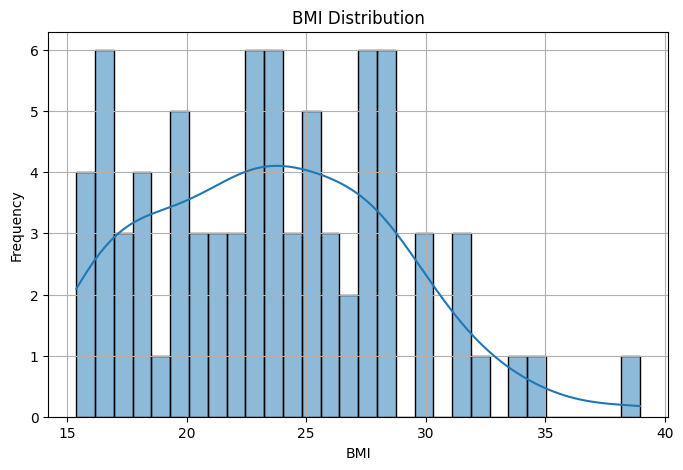

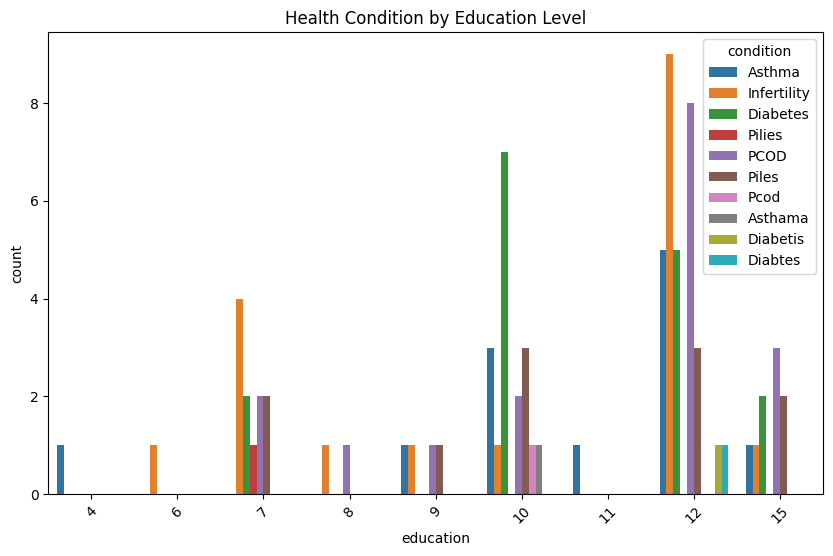

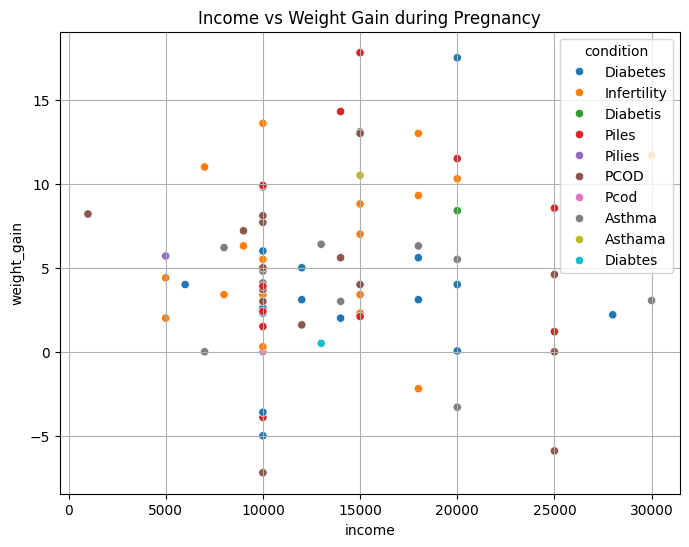

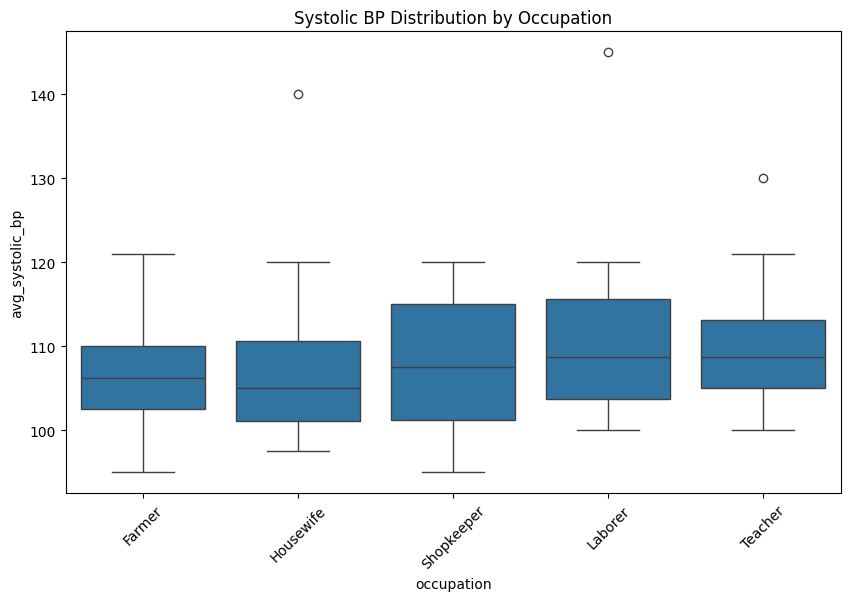

In [7]:
# 1. BMI Distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Education vs Condition
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='education', hue='condition')
plt.title('Health Condition by Education Level')
plt.xticks(rotation=45)
plt.show()

# 3. Income vs Weight Gain
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='income', y='weight_gain', hue='condition')
plt.title('Income vs Weight Gain during Pregnancy')
plt.grid(True)
plt.show()

# 4. Average BP by Occupation
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='occupation', y='avg_systolic_bp')
plt.title('Systolic BP Distribution by Occupation')
plt.xticks(rotation=45)
plt.show()

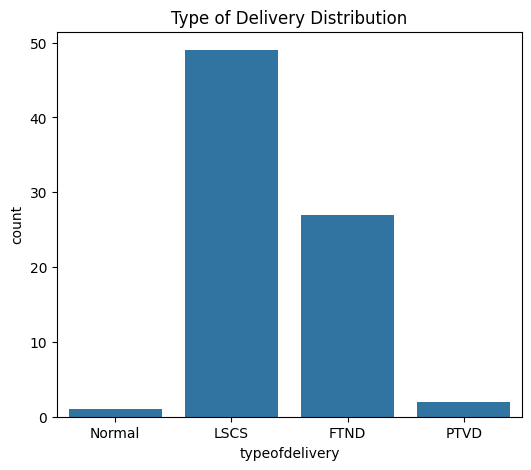

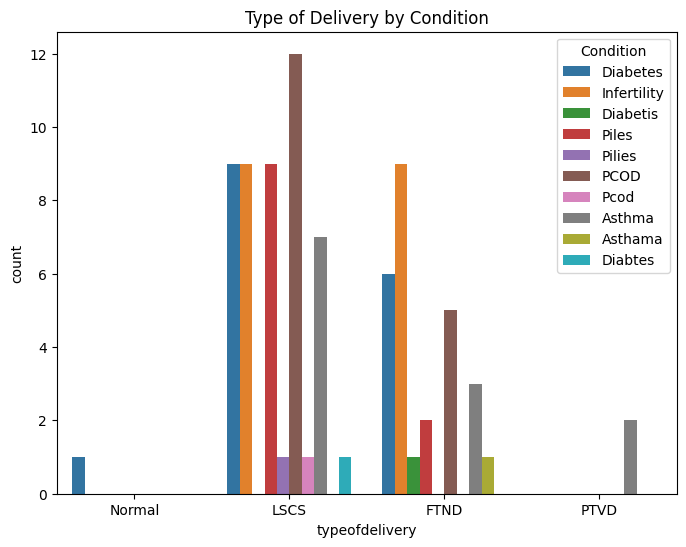

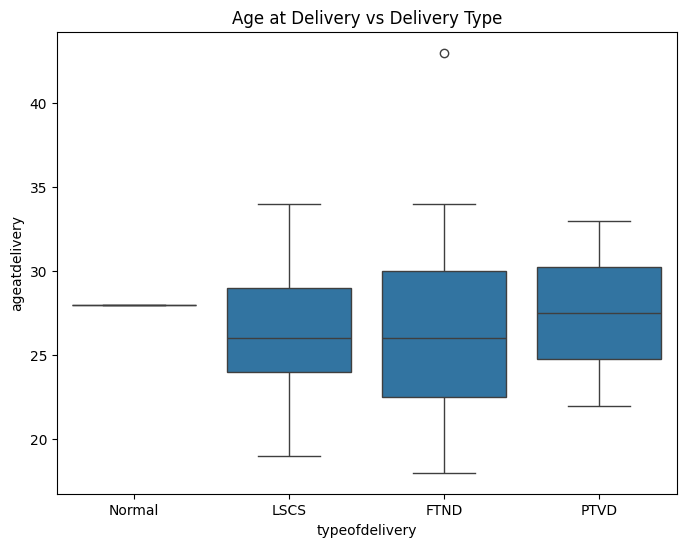

In [11]:
# TYPE OF DELIVERY ANALYSIS


# Type of delivery count
plt.figure(figsize=(6, 5))
sns.countplot(data=merged_data, x='typeofdelivery')
plt.title("Type of Delivery Distribution")
plt.show()

# Type of Delivery vs Condition
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_data, x='typeofdelivery', hue='condition')
plt.title("Type of Delivery by Condition")
plt.legend(title='Condition')
plt.show()

# Type of Delivery vs Age at Delivery
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_data, x='typeofdelivery', y='ageatdelivery')
plt.title("Age at Delivery vs Delivery Type")
plt.show()

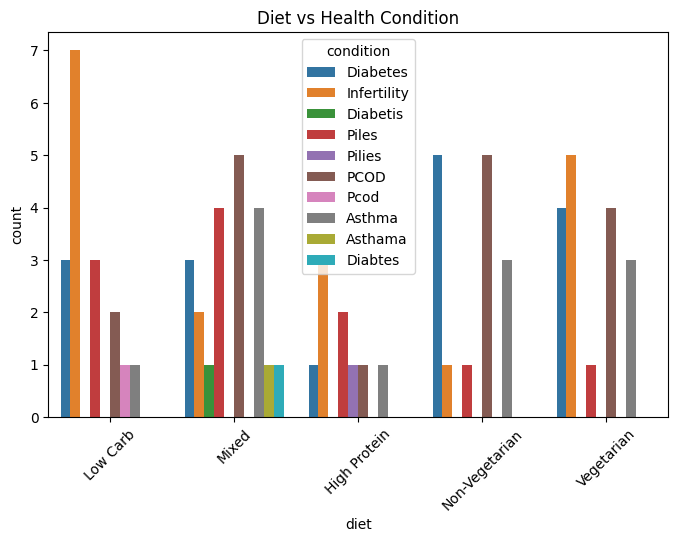

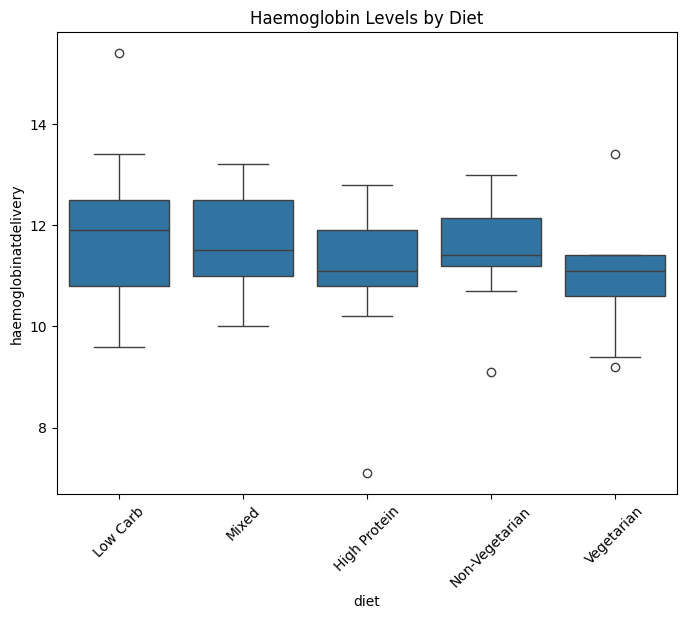

In [12]:
# DIET vs HEALTH OUTCOMES

# Diet vs Condition
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_data, x='diet', hue='condition')
plt.title("Diet vs Health Condition")
plt.xticks(rotation=45)
plt.show()

# Diet vs Haemoglobin
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_data, x='diet', y='haemoglobinatdelivery')
plt.title("Haemoglobin Levels by Diet")
plt.xticks(rotation=45)
plt.show()

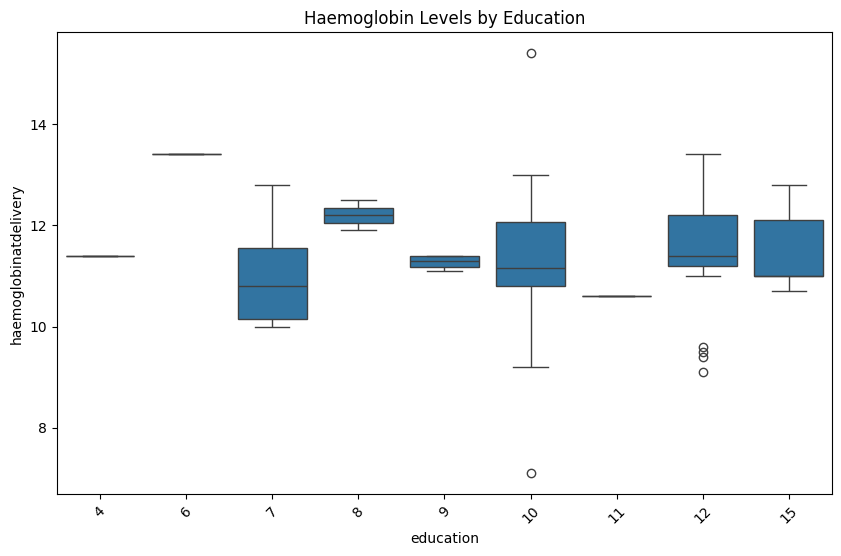

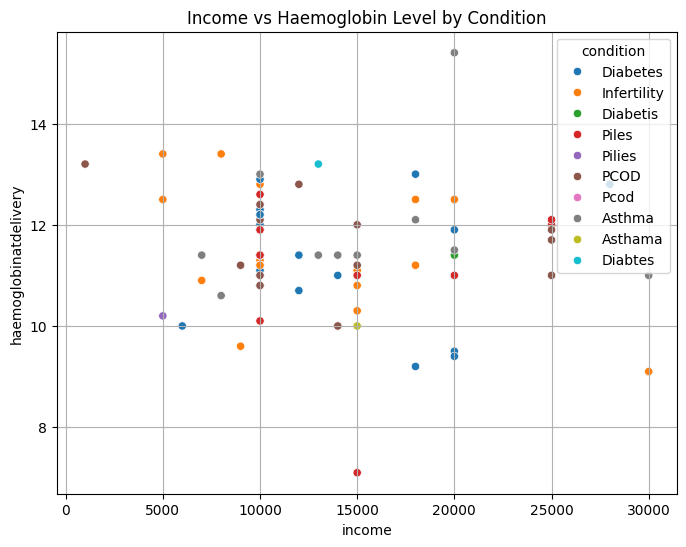

In [13]:
# EDUCATION & INCOME vs HAEMOGLOBIN

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='education', y='haemoglobinatdelivery')
plt.title("Haemoglobin Levels by Education")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='income', y='haemoglobinatdelivery', hue='condition')
plt.title("Income vs Haemoglobin Level by Condition")
plt.grid(True)
plt.show()


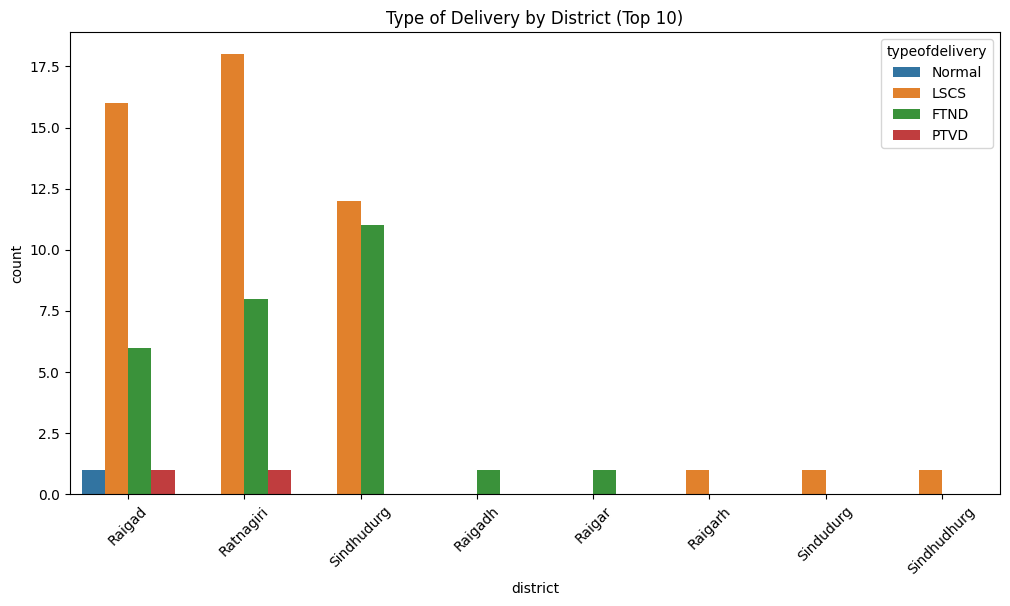

In [18]:
# VILLAGE/DISTRICT BASED INSIGHTS

top_districts = merged_data['district'].value_counts().head(10).index
district_data = merged_data[merged_data['district'].isin(top_districts)]

plt.figure(figsize=(12, 6))
sns.countplot(data=district_data, x='district', hue='typeofdelivery')
plt.title("Type of Delivery by District (Top 10)")
plt.xticks(rotation=45)
plt.show()

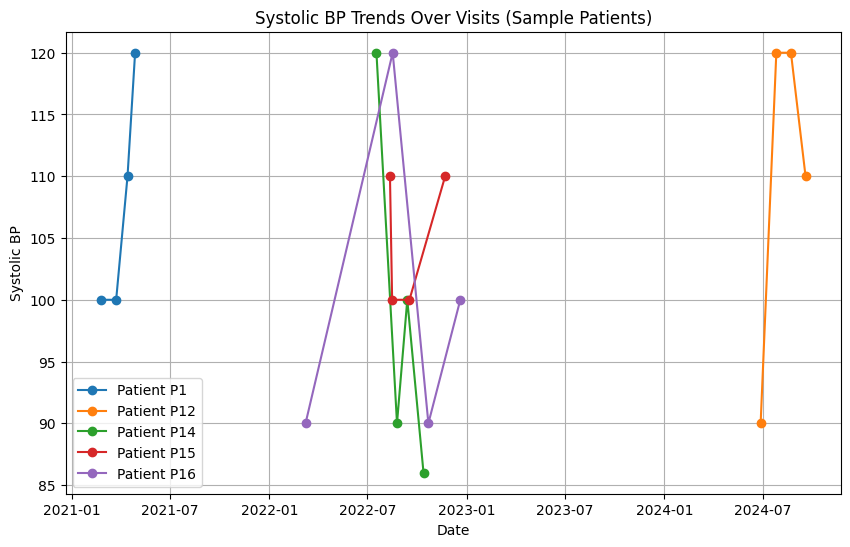

In [23]:
# TIME-SERIES: BP CHANGE OVER VISITS

# Melt for time-series view
bp_data = merged_data[['patient_id', 'Visit1_date', 'Visit1_bpsys', 'Visit2_date', 'Visit2_bpsys',
                       'Visit3_date', 'Visit3_bpsys', 'Visit4_date', 'Visit4_bpsys']]

# Melt to long format
bp_melted = pd.DataFrame()
for i in range(1, 5):
    temp = merged_data[['patient_id', f'Visit{i}_date', f'Visit{i}_bpsys']]
    temp.columns = ['patient_id', 'date', 'bpsys']
    bp_melted = pd.concat([bp_melted, temp])

# Remove NaNs and sort
bp_melted.dropna(inplace=True)
bp_melted = bp_melted.sort_values(by=['patient_id', 'date'])

# Plot for a few patients
sample_ids = bp_melted['patient_id'].dropna().unique()[:5]
plt.figure(figsize=(10, 6))
for pid in sample_ids:
    sub = bp_melted[bp_melted['patient_id'] == pid]
    plt.plot(sub['date'], sub['bpsys'], marker='o', label=f'Patient {pid}')
plt.title("Systolic BP Trends Over Visits (Sample Patients)")
plt.xlabel("Date")
plt.ylabel("Systolic BP")
plt.legend()
plt.grid(True)
plt.show()

🔹 Cesarean Delivery Rate: 0.00%


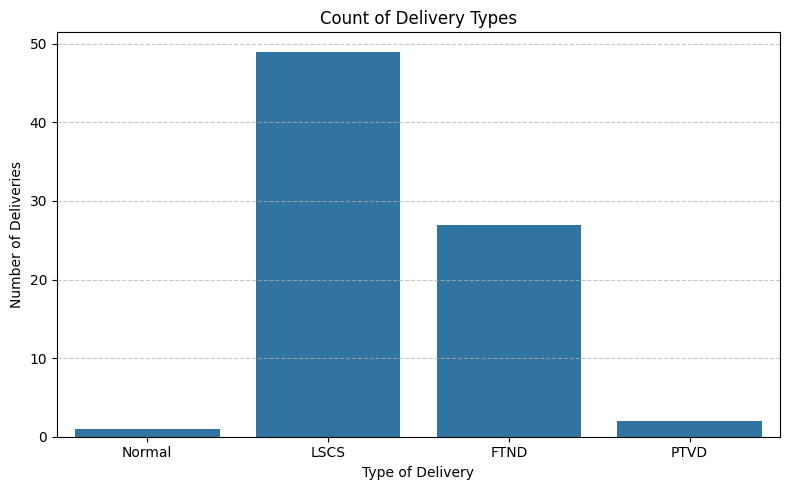

In [35]:
# Cesarean rate
cesarean_rate = (merged_data['typeofdelivery'] == 'Cesarean').mean() * 100
print(f"🔹 Cesarean Delivery Rate: {cesarean_rate:.2f}%")

# Bar chart for overall delivery type
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_data, x='typeofdelivery')
plt.title('Count of Delivery Types')
plt.xlabel('Type of Delivery')
plt.ylabel('Number of Deliveries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

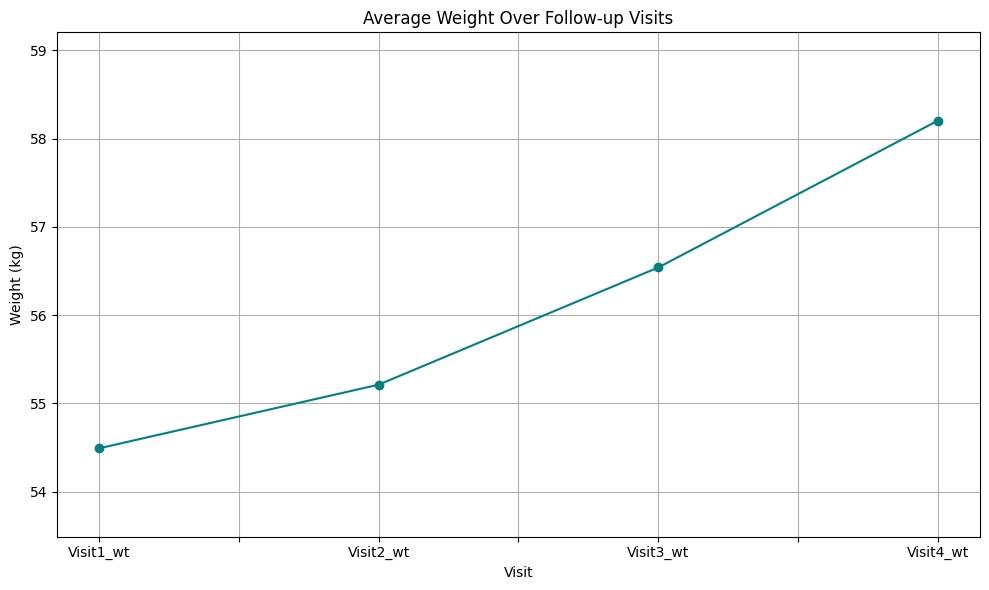

In [44]:
# Calculate average weight across visits
merged_data['avg_weight_change'] = (
    merged_data[['Visit4_wt', 'Visit1_wt']].astype(float).eval('Visit4_wt - Visit1_wt')
)

# Plot: Average weight over time
avg_weights = merged_data[['Visit1_wt', 'Visit2_wt', 'Visit3_wt', 'Visit4_wt']].astype(float).mean()

plt.figure(figsize=(10, 6))
avg_weights.plot(marker='o', color='teal')
plt.title('Average Weight Over Follow-up Visits')
plt.ylabel('Weight (kg)')
plt.xlabel('Visit')
plt.ylim(avg_weights.min() - 1, avg_weights.max() + 1)
plt.grid(True)
plt.tight_layout()
plt.show()


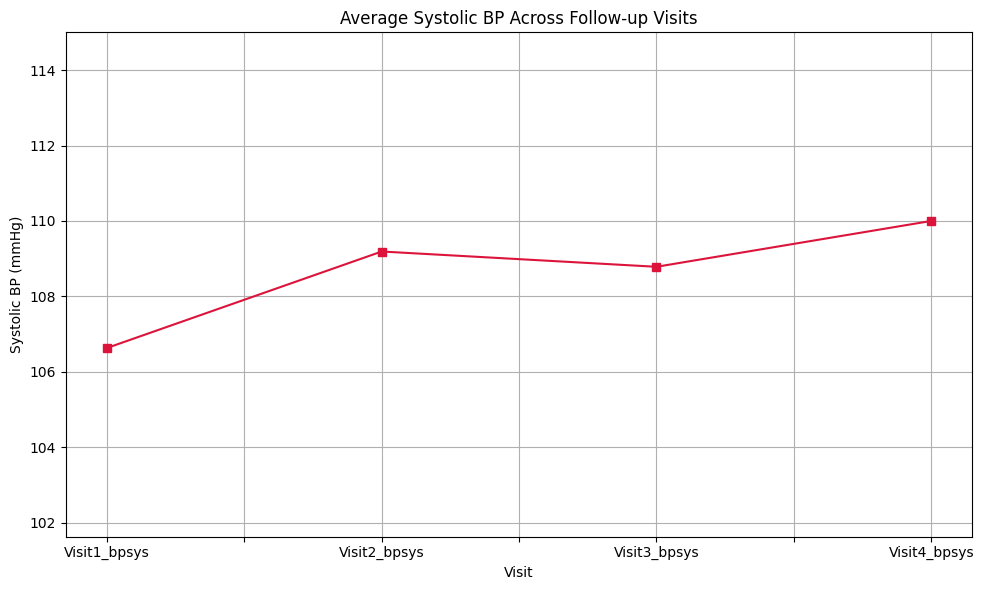

In [45]:
# Average systolic BP over visits
avg_systolic = merged_data[['Visit1_bpsys', 'Visit2_bpsys', 'Visit3_bpsys', 'Visit4_bpsys']].astype(float).mean()

plt.figure(figsize=(10, 6))
avg_systolic.plot(marker='s', linestyle='-', color='crimson')
plt.title('Average Systolic BP Across Follow-up Visits')
plt.ylabel('Systolic BP (mmHg)')
plt.xlabel('Visit')
plt.ylim(avg_systolic.min() - 5, avg_systolic.max() + 5)
plt.grid(True)
plt.tight_layout()
plt.show()


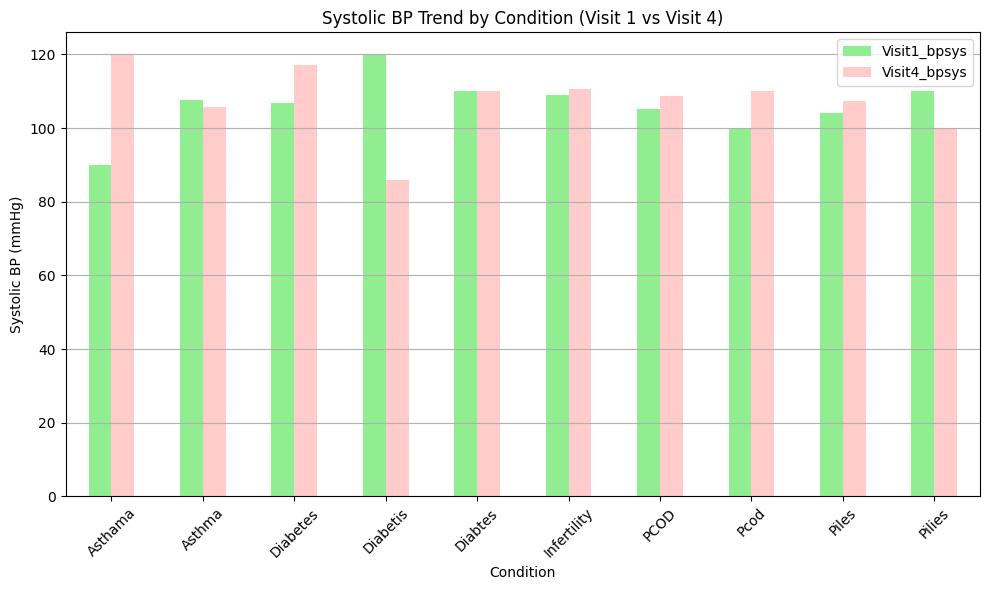

In [46]:
# Add conditions
cond_bp = merged_data[['condition', 'Visit1_bpsys', 'Visit4_bpsys']].dropna()
cond_bp[['Visit1_bpsys', 'Visit4_bpsys']] = cond_bp[['Visit1_bpsys', 'Visit4_bpsys']].astype(float)

cond_bp_grouped = cond_bp.groupby('condition').mean()

# Plot
cond_bp_grouped.plot(kind='bar', figsize=(10, 6), color=['#90ee90', '#ffcccb'])
plt.title('Systolic BP Trend by Condition (Visit 1 vs Visit 4)')
plt.ylabel('Systolic BP (mmHg)')
plt.xlabel('Condition')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


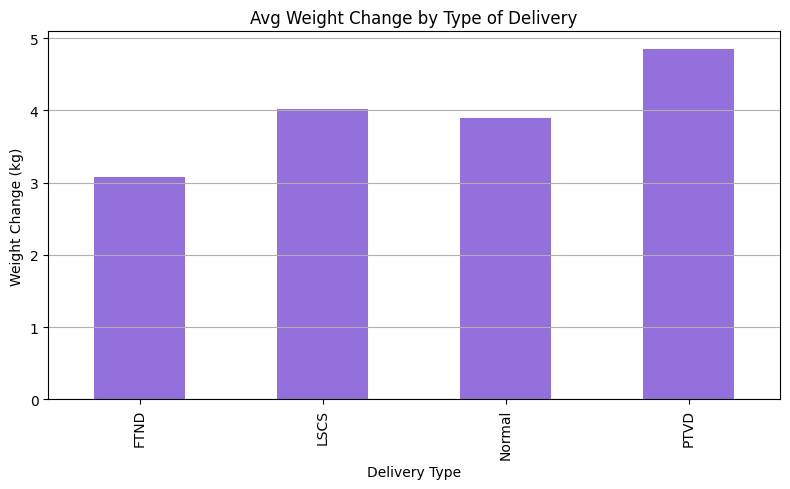

In [47]:
# Weight change by delivery type
merged_data['weight_change'] = merged_data[['Visit1_wt', 'Visit4_wt']].astype(float).eval('Visit4_wt - Visit1_wt')
wt_change_by_delivery = merged_data.groupby('typeofdelivery')['weight_change'].mean()

# Plot
plt.figure(figsize=(8, 5))
wt_change_by_delivery.plot(kind='bar', color='mediumpurple')
plt.title('Avg Weight Change by Type of Delivery')
plt.ylabel('Weight Change (kg)')
plt.xlabel('Delivery Type')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



🔹 Cesarean % by Condition:
 typeofdelivery        FTND        LSCS  Normal       PTVD
condition                                                
Asthama         100.000000    0.000000    0.00   0.000000
Asthma           25.000000   58.333333    0.00  16.666667
Diabetes         37.500000   56.250000    6.25   0.000000
Diabetis        100.000000    0.000000    0.00   0.000000
Diabtes           0.000000  100.000000    0.00   0.000000
Infertility      50.000000   50.000000    0.00   0.000000
PCOD             29.411765   70.588235    0.00   0.000000
Pcod              0.000000  100.000000    0.00   0.000000
Piles            18.181818   81.818182    0.00   0.000000
Pilies            0.000000  100.000000    0.00   0.000000
Unique delivery types: ['Normal' 'LSCS' 'FTND' 'PTVD']


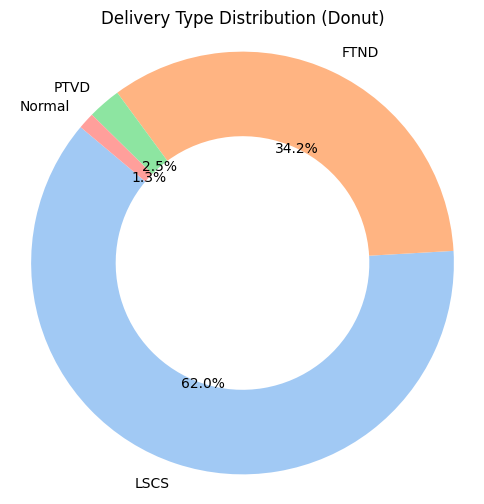

In [34]:
# Condition-specific Cesarean delivery
cesarean_by_condition = pd.crosstab(merged_data['condition'], merged_data['typeofdelivery'], normalize='index') * 100
print("\n🔹 Cesarean % by Condition:\n", cesarean_by_condition)



🔹 Average Haemoglobin by Diet Type:
 diet
Vegetarian        10.905882
High Protein      10.922222
Non-Vegetarian    11.553333
Mixed             11.723810
Low Carb          11.729412
Name: haemoglobinatdelivery, dtype: float64


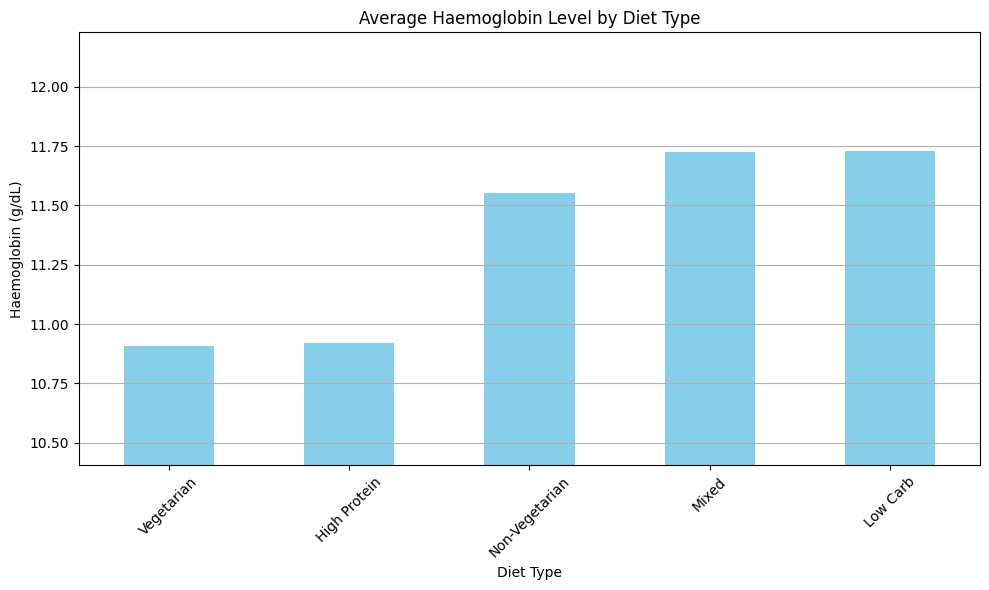

In [36]:
# Average Haemoglobin by Diet Type
haemo_by_diet = merged_data.groupby('diet')['haemoglobinatdelivery'].mean().sort_values()
print("\n🔹 Average Haemoglobin by Diet Type:\n", haemo_by_diet)

# Plot: Haemoglobin by Diet with y-limit
plt.figure(figsize=(10, 6))
haemo_by_diet.plot(kind='bar', color='skyblue')
plt.title('Average Haemoglobin Level by Diet Type')
plt.ylabel('Haemoglobin (g/dL)')
plt.xlabel('Diet Type')
plt.xticks(rotation=45)
plt.ylim(haemo_by_diet.min() - 0.5, haemo_by_diet.max() + 0.5)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


🔹 Villages with Highest Avg Systolic BP:
 village
Guhagar     113.500000
Roha        111.562500
Pen         110.555556
Dapoli      109.850000
Kankavli    109.272727
Name: avg_systolic_bp, dtype: float64


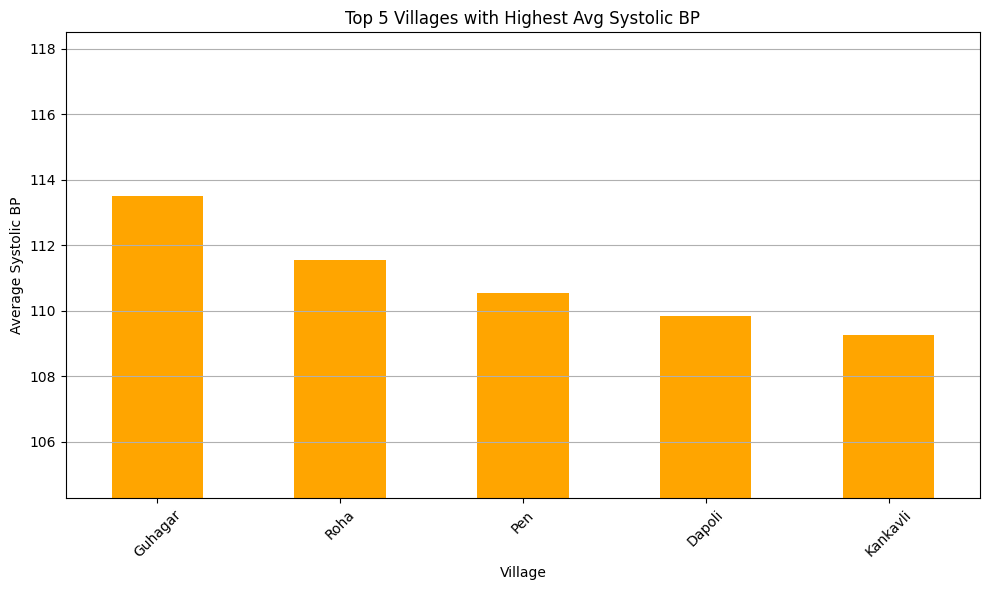

In [37]:
# High BP across villages (top 5 with highest avg BP)
village_bp = merged_data.groupby('village')['avg_systolic_bp'].mean().sort_values(ascending=False).head(5)
print("\n🔹 Villages with Highest Avg Systolic BP:\n", village_bp)

# Plot: Highest Avg BP by Village with y-limit
plt.figure(figsize=(10, 6))
village_bp.plot(kind='bar', color='orange')
plt.title('Top 5 Villages with Highest Avg Systolic BP')
plt.ylabel('Average Systolic BP')
plt.xlabel('Village')
plt.xticks(rotation=45)
plt.ylim(village_bp.min() - 5, village_bp.max() + 5)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

INSIGHT GENERATION

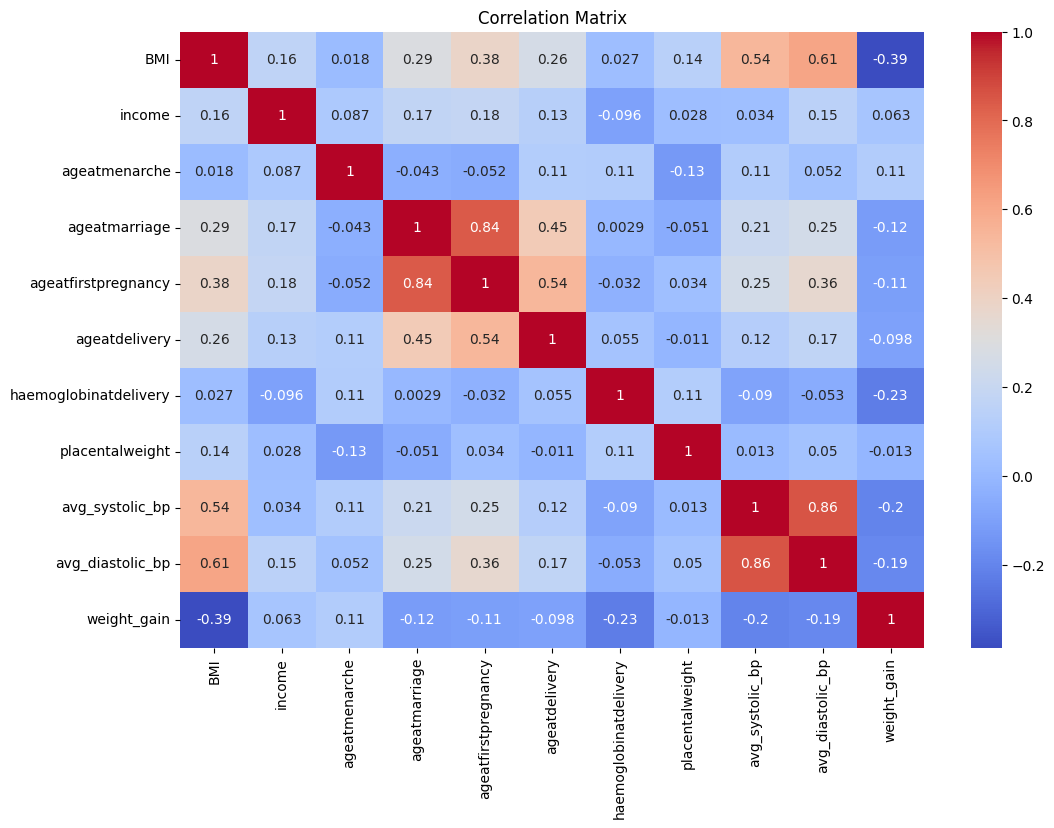

In [17]:
# Correlation matrix
corr_features = ['BMI', 'income', 'ageatmenarche', 'ageatmarriage', 'ageatfirstpregnancy',
                 'ageatdelivery', 'haemoglobinatdelivery', 'placentalweight',
                 'avg_systolic_bp', 'avg_diastolic_bp', 'weight_gain']
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data[corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [24]:
# Grouping by condition
grouped = merged_data.groupby('condition')[['BMI', 'income', 'avg_systolic_bp', 'haemoglobinatdelivery']].mean()
print("\nAverage metrics by condition:\n", grouped)

# High-risk identification
high_risk = merged_data[(merged_data['avg_systolic_bp'] > 140) |
                        (merged_data['haemoglobinatdelivery'] < 9) |
                        (merged_data['BMI'] > 30)]

print(f"\n⚠️ Number of high-risk patients identified: {len(high_risk)}")
print(high_risk[['patient_id', 'avg_systolic_bp', 'haemoglobinatdelivery', 'BMI']])


Average metrics by condition:
                    BMI        income  avg_systolic_bp  haemoglobinatdelivery
condition                                                                   
Asthama      16.233766  15000.000000       105.000000              10.000000
Asthma       21.784643  14583.333333       106.458333              11.883333
Diabetes     25.336513  14250.000000       112.625000              11.262500
Diabetis     16.275932  20000.000000        99.000000              11.400000
Diabtes      28.355388  13000.000000       110.000000              13.200000
Infertility  23.209971  13222.222222       108.888889              11.455556
PCOD         23.232636  13000.000000       108.470588              11.588235
Pcod         20.333267  10000.000000       112.500000              11.200000
Piles        24.966588  14909.090909       106.000000              10.963636
Pilies       25.233726   5000.000000       107.500000              10.200000

⚠️ Number of high-risk patients identified:

🔹 Cesarean Delivery Rate: 0.00%

🔹 Cesarean % by Condition:
 typeofdelivery        FTND        LSCS  Normal       PTVD
condition                                                
Asthama         100.000000    0.000000    0.00   0.000000
Asthma           25.000000   58.333333    0.00  16.666667
Diabetes         37.500000   56.250000    6.25   0.000000
Diabetis        100.000000    0.000000    0.00   0.000000
Diabtes           0.000000  100.000000    0.00   0.000000
Infertility      50.000000   50.000000    0.00   0.000000
PCOD             29.411765   70.588235    0.00   0.000000
Pcod              0.000000  100.000000    0.00   0.000000
Piles            18.181818   81.818182    0.00   0.000000
Pilies            0.000000  100.000000    0.00   0.000000

🔹 Average Haemoglobin by Diet Type:
 diet
Vegetarian        10.905882
High Protein      10.922222
Non-Vegetarian    11.553333
Mixed             11.723810
Low Carb          11.729412
Name: haemoglobinatdelivery, dtype: float64

🔹 Villages with